# Showcase of the basics on Hyperdimensional Computing
## What is it and why?
Hyperdimensional computing is a relatively new paradigm of computing that tries to mimick the workings of a (human) brain (Kanerva). The brain has a massive amount of circuits made of neurons synapses which might suggest that our brains operate on very high dimensional vectors (HDV) of let's say of 10000 of even more bits. This is radically different from the typical modern computer architectures which operate on vectors of 8 to 64 bits. This becomes clear when we compare how easy it is for a human to learn a language compared to computers, which require a large and complecated set of arithmetic operations in the form of machine learning models or deep learning networks together with a large amount of data to try to come close mastering a language whilst a human can recognize other languages relatively easy when they don't even speak it! Likewise languages, we can very easily memorize and compare other intrisically complex and contextual concepts such as images. A computer would have a hard time finding similarity between a set of images and faces because this requires very complex man-made models.

When computing with hyperdimensional vectors, we only use a set of a few simple arithmetic operations which will all be explained later on in more detail. A HDV can represent anything from a word or a concept. This vector is initially made up of totally random bits, but with the simple set of rules, we can use other vectors to combine some concepts into new similar or dissimilar concepts. For example, we would not say that an table is similar to a brocolli but we could say that we can trace back the concept of table to the concept of meal, which in turn can be traced back to 'food' which has in some form similarity with 'brocolli'

This holistic representation of a concept smeared out over a vector consisting of thousands of bits gives rise to interesting properties of this paradigm. It is very tolerant to failure of bits which makes it very robust to noise. This is becaue one bit in a HDV plays a very minimal role and may even be redundant for the represented concept, unlike in modern computer architectures where every bit in a 64 bit vector counts and cannot be changed.

## Generating HDVs
First we should create functions that lets us construct HDVs. An initial HDV is constructed totally random. We can opt for binary, bipolar vectors or even vectors containing real numbers. The nature of the vectors does not matter that much result-wise but using these operations on bipolar vectors will make it more understandable and is easier to implement since we will then use simple algebraic concepts. The choice of the nature of the vectors would also change the nature of the operations as we could use highly efficient bit-operations with binary bits but this heavily restricts the amount of information we can store in the vector as we explain later.(??) The elements of the vectors will still be referred to as 'bits'.

With n corresponding to the amount of vectors and N the length of the vectors.

In [1]:
using LinearAlgebra
hdv(n::Int=1, N::Int=10000) = rand((-1,1), n, N)

hdv (generic function with 3 methods)

In [2]:
x = hdv()

1×10000 Matrix{Int64}:
 -1  1  1  1  -1  1  1  -1  -1  -1  1  …  -1  -1  -1  -1  -1  1  -1  1  1  1

In [3]:
y = hdv()

1×10000 Matrix{Int64}:
 -1  1  1  1  -1  1  -1  -1  -1  1  1  …  -1  1  1  1  1  1  1  -1  1  1  1

## Operations on HDVs
In this part we will try to explain the different operations we could perform on HDVs which we could use for further modeling.
### Adding (bundling)
The element-wise addition of two of these kind of vectors result in a vector that is the most similar to both vectors. This result should also be normalized and and can be thus considered as a mean vector of the bundled vectors.(Kanerva)??? We can choose how far we want to go with this. If we allow zeros in our 'bipolar' vectors, we can easily see the disagreement of the corresponding elements of the strictly bipolar parent vectors. This also means that no information is lost if we don't restrict the resulting vectors to a strict bipolar nature.

In [4]:
add(vectors::Matrix{Int}...) = reduce(.+, vectors) .|> sign

add (generic function with 1 method)

In [5]:
add(x,y)

1×10000 Matrix{Int64}:
 -1  1  1  1  -1  1  0  -1  -1  0  1  0  …  0  0  0  0  0  0  1  -1  1  1  1

In [6]:
z = hdv()

1×10000 Matrix{Int64}:
 -1  -1  1  1  1  1  -1  1  1  -1  1  …  -1  -1  1  -1  -1  -1  1  1  1  -1

In [7]:
add(x,y,z)

1×10000 Matrix{Int64}:
 -1  1  1  1  -1  1  -1  -1  -1  -1  1  …  -1  -1  1  -1  -1  1  -1  1  1  1

### Multiplying (binding)
This operation encodes the interaction between two vectors and thus creates a vector dissimilar to the two parent vectors. For bipolar parent vectors, element-wise multiplication suffices. For strictly bipolar vectors, this also implies we can reverse the binding operation by doing the same operation again thus recovering the data. For binary vectors, this operation corresponds to a logical XOR gate.

In [8]:
multiply(vectors::Matrix{Int}...) = reduce(.*, vectors)

multiply (generic function with 1 method)

In [9]:
multiply(x, y)

1×10000 Matrix{Int64}:
 1  1  1  1  1  1  -1  1  1  -1  1  -1  …  -1  -1  -1  -1  -1  1  1  1  1  1

In [10]:
multiply(x, y, z)

1×10000 Matrix{Int64}:
 -1  -1  1  1  1  1  1  1  1  1  1  1  …  -1  1  1  -1  1  1  -1  1  1  1  -1

### Permutation (shifting)
We can also include positional information, for example a sequence of letters. This is possible by a cyclic permutation by shifting every element to the right.

In [11]:
perm(vector::Matrix, k::Int=1) = circshift(vector, (0, k))

perm (generic function with 2 methods)

In [12]:
sum(x.==perm(x))

4876

In [13]:
circshift(x, 1)

1×10000 Matrix{Int64}:
 -1  1  1  1  -1  1  1  -1  -1  -1  1  …  -1  -1  -1  -1  -1  1  -1  1  1  1

Let's say we want to encode the sequence of letters 'xyz' into one vector, we can bind the vectors of each letter but shift the vectors according to their index.

In [14]:
xyz = multiply(x, perm(y), perm(z, 2))

1×10000 Matrix{Int64}:
 -1  1  -1  -1  -1  -1  1  1  -1  1  1  …  1  1  -1  1  1  -1  -1  1  1  1  1

### Similarity measurement


To quantify the similarity between two HDVs, we can tackle it in numerous ways depending on the nature of the vectors. For bipolar vectors, a cosine similarity measure fits our needs. 
$$\cos(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}||\, ||\mathbf{y}||}\,.$$
If the cosine similairty is equal to -1, the two vectors are totally opposite to eachother. If it's equal to 1, the vectors are equal and if the cosine similarity equals to 0, the vectors are orthogonal to eachother.

In [15]:
cosine(x::Matrix{Int}, y::Matrix{Int}) = dot(x, y) / (norm(x) * norm(y))

cosine (generic function with 1 method)

As we can see and expect, 2 unrelated random vectors are close to being orthogonal.

In [16]:
cosine(x, y)

-0.0048

## Operations on binary HDV

In [3]:
using Random
bitHDV(N::Int=10000) = bitrand(N)

bitHDV (generic function with 3 methods)

In [2]:
r = bitHDV()

10000×1 BitMatrix:
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 1
 0
 ⋮
 1
 0
 1
 0
 1
 0
 0
 1
 1
 1
 0
 0

In [19]:
s = bitHDV()

10000-element BitVector:
 0
 0
 0
 1
 1
 0
 0
 0
 1
 0
 0
 0
 0
 ⋮
 0
 1
 0
 0
 0
 1
 1
 1
 0
 1
 1
 0

In [20]:
t = bitHDV()

10000-element BitVector:
 0
 0
 1
 1
 1
 1
 0
 1
 0
 0
 0
 1
 1
 ⋮
 0
 1
 0
 1
 1
 0
 0
 0
 0
 1
 1
 1

### Addition
To bundle multiple binary vectors, we can do an element-wise addition. The resulting vector is binarized based on the majority element. For an odd amount of vectors to bundle, this is no problem and we would see no ambiguity but for an even amount vectors we have to imply a bias (choose 0 or 1) if there would be no majority element. Of course, this would lead to a loss of accuracy, but working with binary vectors may lead to an increase in speed (should test this). This bias can be reduced by adding a random vector (apparently, looking into this).
There is no easy function implemented in Julia that can do this, so this may be not the most optimal algorithm.

In [21]:
function bitadd(vectors::BitVector ...)
    v = reduce(.+, vectors)
    n = length(vectors) / 2
    x = [i > n ? 1 : i < n ? 0 : rand(0:1) for i in v]
    return convert(BitVector, x)
end

bitadd (generic function with 1 method)

In [22]:
bitadd(s,t)

10000-element BitVector:
 0
 0
 1
 1
 1
 0
 0
 1
 0
 0
 0
 0
 1
 ⋮
 0
 1
 0
 0
 0
 0
 1
 1
 0
 1
 1
 0

In [23]:
bitadd(r, s, t)

10000-element BitVector:
 0
 0
 0
 1
 1
 1
 0
 0
 1
 0
 0
 1
 0
 ⋮
 0
 1
 0
 0
 1
 1
 1
 1
 0
 1
 1
 0

### Multiplication
Binding binary vectors is represented by an bitwise XOR operation.

In [24]:
bitbind(vectors::BitVector ...) =  reduce(.⊻, vectors)

bitbind (generic function with 1 method)

In [25]:
bitbind(r,s,t)

10000-element BitVector:
 1
 0
 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 1
 ⋮
 1
 0
 1
 1
 0
 0
 0
 0
 1
 0
 0
 1

### Permutation
This operation is the same for binary vectors as for bipolar vectors

In [26]:
bitperm(vector::BitVector, k::Int=1) = circshift(vector, k)

bitperm (generic function with 2 methods)

In [27]:
bitperm(r)

10000-element BitVector:
 0
 1
 0
 0
 0
 0
 1
 0
 0
 1
 0
 0
 1
 ⋮
 0
 1
 0
 1
 0
 1
 1
 1
 1
 1
 0
 0

### Similarity measurement
The equivalent of a cosine similarity for binary vectors could be the Hamming distance. A Hamming distance of 0 between two vectors means that they are equal, 1 would mean that they are totally opposite and 0.5 would mean that they are orthogonal.

In [28]:
hamming(x::BitVector, y::BitVector) = sum(x .!= y)/length(x)

hamming (generic function with 1 method)

In [29]:
hamming(r,s)

0.5053

## Examples

See example 1 in thesis. Results in acceptable 0.5 cosine similairty. (So 75% accuracy?)

In [30]:
v = Vector()
for i in 1:10000
    a, b, c, x, y, z =  hdv(), hdv(), hdv(), hdv(), hdv(), hdv() 
    d = add(multiply(a, x), multiply(b, y), multiply(c, z)) 
    ap = multiply(x, d) 
    score = cosine(ap, a)
    append!(v, score)
end

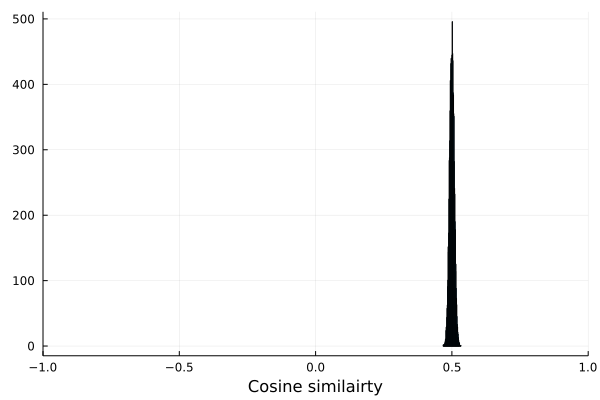

In [31]:
using Plots
let
	p = histogram(v, xlims=(-1,1), label="", xlabel="Cosine similairty")
end

The same as above has been done for binary vectors, around 0.25 so also 75%?

In [32]:
v = Vector()
for i in 1:10000
    a, b, c, x, y, z = bitHDV(), bitHDV(), bitHDV(), bitHDV(), bitHDV(), bitHDV()
    d = bitadd(bitbind(a, x), bitbind(b, y), bitbind(c, z))
    ap = bitbind(x, d)
    score = hamming(ap, a)
    append!(v, score)
end

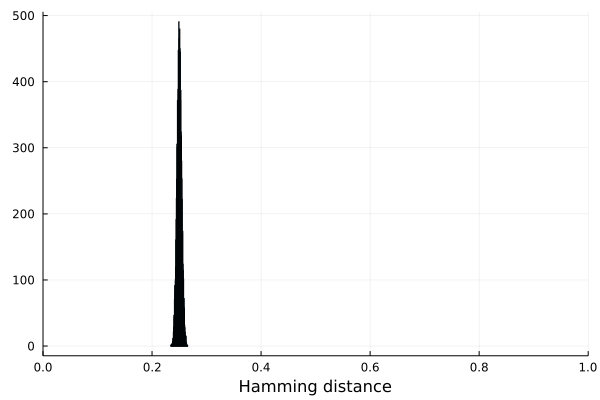

In [33]:
using Plots
let
	p = histogram(v, xlims=(0,1), label="", xlabel="Hamming distance")
end

In [34]:
v = Vector()
for i in 1:10000
    a, b, c, x, y, z =  hdv(1,100000), hdv(1,100000), hdv(1,100000), hdv(1,100000), hdv(1,100000), hdv(1,100000)
    d = add(multiply(a, x), multiply(b, y), multiply(c, z)) 
    ap = multiply(x, d) 
    score = cosine(ap, a)
    append!(v, score)
end

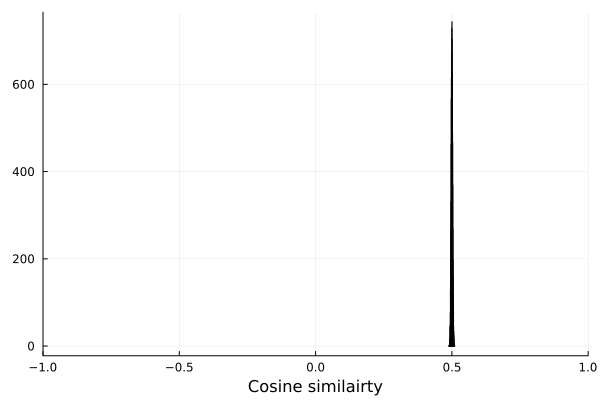

In [35]:
using Plots
let
	p = histogram(v, xlims=(-1,1), label="", xlabel="Cosine similairty")
end

In [36]:
v = Vector()
for i in 1:10000
    a, b, c, x, y, z = bitHDV(100000), bitHDV(100000), bitHDV(100000), bitHDV(100000), bitHDV(100000), bitHDV(100000)
    d = bitadd(bitbind(a, x), bitbind(b, y), bitbind(c, z))
    ap = bitbind(x, d)
    score = hamming(ap, a)
    append!(v, score)
end

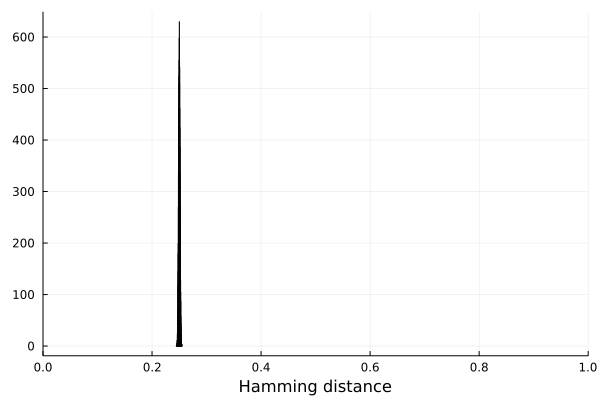

In [37]:
using Plots
let
	p = histogram(v, xlims=(0,1), label="", xlabel="Hamming distance")
end